# Hypothesis Testing



As data scientists, we often find the need to make decisions based on the data we have collected. After obtaining our statistics, we can have a decent _feeling_ or _opinion_ on whether our data is valid and shows significant results. But how can we make more objective decisions based on our results?

Thus arises the need for __statistical hypothesis testing__, also known as __confirmatory data analysis__. It provides us with a framework for using statistical and probabilistic methods on our data to be able to determine the significance of our results. 

We assume that you are already familiar with basic statistics terms, such as mean, standard deviation, or mean square error. Otherwise, refer to the Data Wrangling module in the Data Engineering content.

We will finish this notebook with one of the most popular applications of hypothesis testing: __A/B Testing__

## Null & Alternative Hypotheses



In hypothesis testing, we have to construct two opposing hypotheses. The first one is known as the __null hypothesis__ ($\mathbf{H_{0}}$) and is the hypothesis you are trying to __reject__. The second one is known as the __alternative hypothesis__ ($\mathbf{H_{A}}$), and is the hypothesis you are trying to __support__. Within this framework, we assume the null hypothesis is true, and use statistical methods to determine whether our evidence is conclusive __enough__ to reject the null hypothesis, and support the alternative hypothesis.

This is a similar framework to the approach used in court cases. During a trial, the outlook is that a person is 'innocent until proven guilty'. This means that, in this case:
- $\mathbf{H_{0}}$: The person is innocent
- $\mathbf{H_{A}}$: The person is guilty

And the prosecuting lawyers will use various pieces of evidence to reject $\mathbf{H_{0}}$. 

In general, we can think of the null hypothesis as being 'your evidence _does not_ suggest what you think' and the alternative as being 'your evidence _does_ suggest what you think'. You assume your evidence _does not_ contribute anything new until you have statistical measures that suggest your evidence _does_ contribute to something new.

As we will see later on, we will have different levels of statistical significance for our data. We can set thresholds to determine at which point of significance we reject our null hypothesis, but this threhsold depends on the context of the problem and is up for data scientists and statisticians to determine. How do we go about determining these thresholds? We will see that shortly, first, let's talk about some very important concepts regarding hypothesis testing. 

### __Normal Distribution__

A probability distribution is a function that maps values to probabilities. For example, we can see how likely it is that a person has a certain height.

The __normal distribution__, often called Gaussian distribution, is an important continuous probability distribution that describes the probability of a random variable. 

The normal distribution is a bell-shaped curve that is centered around the mean ($\mu$). Naming the standard deviation $\sigma$, we know that the range between $\mu - \sigma$ and $\mu + \sigma$ takes up to 68.26% of the area under the curve. The range between $\mu - 2\sigma$ and $\mu + 2\sigma$ takes up to 95.44% of the area under the curve.

<p align=center><img src=images/normal.png width=600></p>

Thanks to these properties, we can get the probability of a random variable to happen given that the variable follows a normal distribution.

We can normalize the samples we have to follow a normal distribution with a mean of 0 and a standard deviation of 1. This is called __standardization__. Standardization is very useful to calculate the aforementioned probabilities. We can standardize our data by subtracting the mean and dividing by the standard deviation.



$$
Z = \frac{X - \mu}{\sigma}
$$

Let's say we have a sample of heights of people in a group. We can calculate the probability of a person having a certain height by standardizing the sample, and then using what we call Z value you obtained with the value above. There are many resources online that can help you relate Z values to probabilities.

One example that you can find is the following one, where the table is giving you the probability of a person being under a certain height. Let's say that the mean of the sample is 170 cm and the standard deviation is 2.4 cm. You can calculate the probability of finding someone under 175 cm by standardizing the sample:

$$
Z = \frac{175 - 170}{2.4} = 2.08
$$

Now, we take a look at the table:

<p align=center><img src=images/z-table.png width=600></p>

On the left hand side, we have to find the Z value up to the first decimal place, the number on the first row show the second decimal place. So, on the left hand side, we need to find 2.0, and in the first row, we have to find 0.08. That gives us 0.9812. Thus, we have a probability of 98.12% of finding someone under 175 cm.

We can use the same metric to find the probability of finding someone over 175 cm, because the normal curve is symmetric.

$$
P = 1 - 0.9812 = 0.0188
$$

So, we have a 1.88% chance of finding someone over 175 cm.

Notice that the values in the Z table are positive. There are other tables that also shows negative values:

<p align=center><img src=images/z-negative.png width=600></p>

Can you think of a way to calculate the probability of someone being between 150 and 175 cm?

### t-Distribution

A very similar distribution is the __t-distribution__. It also follows a bell-shaped curve, but the tails are wider and the peak is lower. This is because the t-distribution doesn't take into account the whole population, so it has a sample with its own mean and standard deviation, which in turn leads to a higher variance. 

If we increase the number of samples, the t-distribution moves towards the normal distribution.

<p align=center><img src=images/t-distribution.png width=600></p>

We are not going to cover how to calculate the t-value, and there are tables that can help you find the t-value, or even Python libraries that can help you find the t-value. 

We will mention, however, that you can use the t-value to find the statistical significance of the difference between the population mean and a hypothesized value (1-sample t) or between two distributions (2-sample t).

### __Significance level (α)__

The significance level, also denoted as alpha or α, is the probability of rejecting the null hypothesis given that the null hypothesis is true. Generally, we use the significance value of 0.05

For example, if the significance level is 0.05, there is a 5% chance of rejecting the null hypothesis. Let's combine this with the normal distribution we saw above to set an example. 

For example, if the mean of the sample is 170 cm and the standard deviation is 2.4 cm, and we want to check if the mean height of another sample is different from the hypothesized mean. The second sample has a mean of 175 cm.

<p align=center><img src=images/significance.png></p>

The picture above shows a significance level of 0.05. The red areas adds up to a 5% under the curve, so we have a 5% chance of falling under that area. If we fall under it, we reject the null hypothesis.

The Z value of a height of 175cm is 2.08, so that means that we can reject the null hypothesis with a 5% significance level.

However, we can set a significance level of 0.01:

<p align=center><img src=images/significance_2.png></p>


And now, 175 cm is not significantly different from 170 cm. So be vary careful when using this significance level!


### __p-Value__



It is the probability of obtaining the test results considering the null hypothesis is true. In other words, it is the probability that the difference between the two values is just because of random chance. The smaller the p-value, the stronger the chances to reject the null hypothesis. If the p-value is lower than the significance level, we can reject the null hypothesis.

In the example above, we can calculate the p-value as the shaded areas above 175 cm and its symetric counterpart.


<p align=center><img src=images/p_value.png></p>

There is a probability of 0.0188 at each side of the curve, so the total probability is 0.0376. This probability represents the likelihood of obtaining a sample mean that is at least as extreme as our sample mean in both tails of the distribution if the population mean is 260. That’s our p value!

# Type I & Type II Errors



Statistical hypothesis testing is meant to help data scientists and statisticians to reach a more objective conclusion based on how statistically significant our results are. But the issue arises when we have to determine a given threshold for significance. For instance, when do we reject our null hypothesis? at 70% certainty? 95% certainty? 99.9% certainty? To choose an appropriate _threshold_ of certainty, we have to understand to context of our experiment.

Let us go back to the analogy of a court case. Since in a court case, you can never have 100% certainty, there is always a probability of wrongully arresting an innocent person or letting a guilty person walk free. Consider the possibilities in the table below.




<center>

|                     | Court Case Outcomes |                     |
|---------------------|---------------------|---------------------|
|                     | Truly Innocent      | Truly Guilty        |
| Determined Innocent | Correct             | Failed imprisonment |
| Determined Guilty   | Wrongful arrest     | Correct             |

</center>



There are two distinct types of mistakes that can happen in the decision process. When we arrest an innocent person, we have committed a __Type I error__, where we __wrongfully reject the null hypothesis (false positive)__. When we fail to arrest a guilty person, we have commited a __Type II error__, where we __wrongfully accept the null hypothesis (false negative)__. In general, when we aim to minimize the likelihood one type of error, the likelihood of the other error increases. In this case, if we are highly strict and demand a very high degree of certainty, we will minimize the number of wrongful arrests (Type I), but it also becomes more likely to not arrest someone who is guilty (Type II). On the other hand, if judges demand a lesser degree of certainty, we will arrest more guilty people, but are also more likely to wrongfully arrest an innocent person.

In our modern judicial system, we believe that the accused is innocent until proven guilty, and that wrongful imprisionment is worse than letting a guilty person walk free.

<center>
<p><img src='images/free.png' width=150><img src='images/balance.png' width=250><img src='images/arrested.png' width=250></p>
</center>

Therefore, we require a high degree of certainty to arrest someone, and put our efforts into minimizing the number of wrongful arrests. This principle applies to other contexts of hypothesis testing: given the context we use our best judgement to determine what type of errors we want to minimize, and set our parameters and hypotheses accordingly.

# A/B Testing

A/B testing is a basic control experiment. It is a way to compare the two versions of a variable to find out which performs better in a controlled environment.

For instance, you have made certain changes to your website recently. Unfortunately, you have no way of knowing with full accuracy how the next 100,000 people who visit your website will behave. That is the information we cannot know today, and if we were to wait until those 100,000 people visited our site, it would be too late to optimize their experience.

You can divide the products into two parts – A and B. Here A will remain unchanged while you make significant changes in B’s packaging. Now, on the basis of the response from customer groups who used A and B respectively, you try to decide which is performing better.

<p align=center><img src=images/ab_test.png width=500></p>


The objective here is to check which option brings higher traffic on the website i.e the conversion rate. We will use A/B testing and collect data to analyze which option performs better.

## Formulate an hypothesis

$\mathbf{H_{0}}$: From an A/B test perspective, the null hypothesis states that there is no difference between the control and variant groups. Here our $\mathbf{H_{0}}$ is "there is no difference in the conversion rate in customers receiving option A and B".

$\mathbf{H_{a}}$: The alternative hypothesis is what you might hope that your A/B test will prove to be true. In our example, the $\mathbf{H_{a}}$ is "the conversion rate of option B is higher than those who receive option A".

We have to collect enough evidence through our tests to reject the null hypothesis.

## Create Control Group and Test Group

The next step is to decide the group of customers that will participate in the test. Here we have two groups – The Control group, and the Test (variant) group.

The Control Group is the one that will receive newsletter A and the Test Group is the one that will receive newsletter B.

## Statistical significance

How can we conclude from here that the Test group is working better than the control group?

For rejecting our null hypothesis we have to prove the Statistical significance of our test.

There are two types of errors that may occur in our hypothesis testing:

1. __Type I error__: We reject the null hypothesis when it is true. That is we accept the variant B when it is not performing better than A
2. __Type II error__: We failed to reject the null hypothesis when it is false. It means we conclude variant B is not good when it performs better than A

That means the difference between your control version and the test version is not due to some error or random chance. To prove the statistical significance of our experiment we can use a two-sample T-test.

The two–sample t–test is one of the most commonly used hypothesis tests. It is applied to compare the average difference between the two groups.


In [ ]:
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pylab as plt
data= pd.read_csv("https://aicore-files.s3.amazonaws.com/Data-Science/ab_data.csv")

In [2]:
data

,Day,Conversion_A,Conversion_B
0,1,0.15,0.19
1,2,0.12,0.20
2,3,0.18,0.18
3,4,0.19,0.22
4,5,0.17,0.19
5,6,0.13,0.17
6,7,0.14,0.18
7,8,0.23,0.20
8,9,0.11,0.17
9,10,0.15,0.22


The data is representing percentage of users that clicked on an ad when they were presented with layout A, and people who clicked on the ad when they wew presented with layout B

Let’s plot the distribution of target and control group:

/home/ivanyingx/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ivanyingx/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


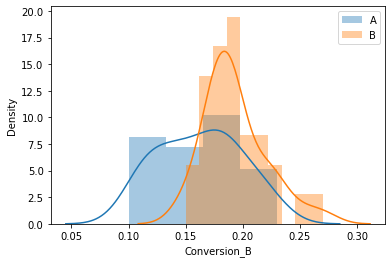

In [3]:
plt.figure("Test Plots")
sns.distplot(data.Conversion_A, label='A')
sns.distplot(data.Conversion_B, label='B')
plt.legend()
plt.show()


We can use scipy to calculate the t-value. Remember that the t-value tells us whether the difference between the two groups is statistically significant.

In [7]:
help(ss.ttest_ind)

Help on function ttest_ind in module scipy.stats.stats:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test,

In [6]:
t_stat, p_val= ss.ttest_ind(data.Conversion_B, data.Conversion_A)
print(f'The t-test value is {t_stat}, and the p-value is {p_val}')

The t-test value is 3.78736793091929, and the p-value is 0.000363796012828762


Here, our p-value is less than the significance level i.e 0.05. Hence, we can reject the null hypothesis. This means that in our A/B testing, option B is performing better than option A. So our recommendation would be to replace our current option with B to bring more traffic on our website.

There are many tools available for conducting A/B testing but being a data scientist you must understand the factors working behind it. Also, you must be aware of the statistics in order to validate the test and prove its significance.